# Создание модели `Соотношение матрица-наполнитеь`

## Импорт всех необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization

2023-03-25 17:00:06.923004: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
#дополнительные настройки
from tensorflow.test import gpu_device_name
from tensorflow.keras import callbacks
import warnings
warnings.simplefilter("ignore")
sns.set_style('dark')
%matplotlib inline

In [3]:
#проверим подключение к видеокарте
if gpu_device_name():
    print("Nvidia CUDA")
else:
    print("CPU")

Nvidia CUDA


2023-03-25 17:00:15.229155: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-25 17:00:15.262545: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-25 17:00:15.272897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-25 17:00:15.273938: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so ret

## Загрузка предобработанного датасета

In [4]:
df = pd.read_csv('./datasets/matrix_model_vkr.csv', index_col=0)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.493807,0.543592,0.410535,0.417453,0.391619,0.555508,0.343908,0.403210,0.282786,0.676575,0.000000,0.537681,0.674940
1,0.494019,0.481187,0.457752,0.484098,0.337482,0.276128,0.053441,0.668292,0.807097,0.482311,0.282052,0.487866,0.361275
2,0.494159,0.349381,0.575598,0.653034,0.619612,0.456719,0.205998,0.403605,0.330143,0.809870,0.000000,0.150196,0.580657
3,0.494257,0.231355,0.398605,0.624515,0.626580,0.452813,0.517618,0.726416,0.637370,0.504352,0.000000,0.190160,0.293122
4,0.494511,0.272762,0.717584,0.399530,0.552837,0.768800,0.070954,0.512946,0.098389,0.370710,0.000000,0.668009,0.184614


In [5]:
df.shape

(1653, 13)

In [6]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [7]:
X = df.drop(['Соотношение матрица-наполнитель'], axis=1)
y = df[['Соотношение матрица-наполнитель']]

#### Разделим на тренировочные и тестовые выборки

In [8]:
#Train_test_split для cоотношение матрица-наполнитель
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1157, 12) (496, 12) (1157, 1) (496, 1)


In [10]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

1157 1157 496 496


## Обучение модели для прогноза соотношение матрица-наполнитель

In [11]:
normalizer = Normalization()
normalizer.adapt(np.array(X_train))

2023-03-25 17:00:40.467794: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-25 17:00:40.468623: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-25 17:00:40.469306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-25 17:00:40.470216: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-25 17:00:40.470798: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

In [12]:
model = Sequential([ 
    normalizer,
    Dense(128, activation='tanh'),
    Dropout(0.8),
    Dense(64, activation='tanh'),
    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,010
Trainable params: 9,985
Non-trainable params: 25
____________________________________________________

In [13]:
model.compile(optimizer='rmsprop', loss='mean_absolute_error')

In [14]:
history = model.fit(X_train,y_train,  verbose=0, 
                    epochs= 1100, batch_size=500, validation_split = 0.2)

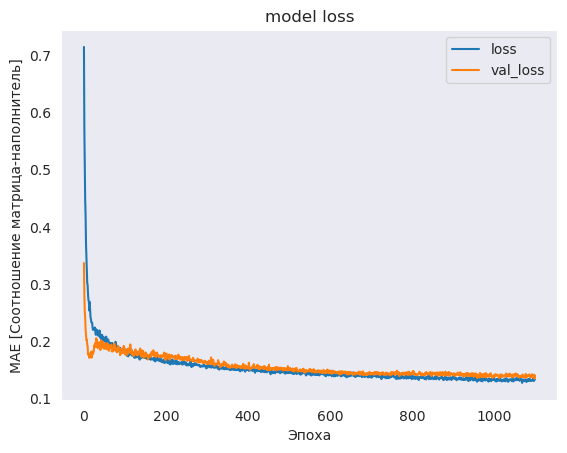

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('model loss')
plt.ylabel('MAE [Соотношение матрица-наполнитель]')
plt.xlabel('Эпоха')
plt.legend(loc='upper right')
plt.show()

In [20]:
y_pred = model.predict(X_test).flatten()
y_test = np.asarray(y_test).flatten()

16/16 [==============================] - 0s 1ms/step


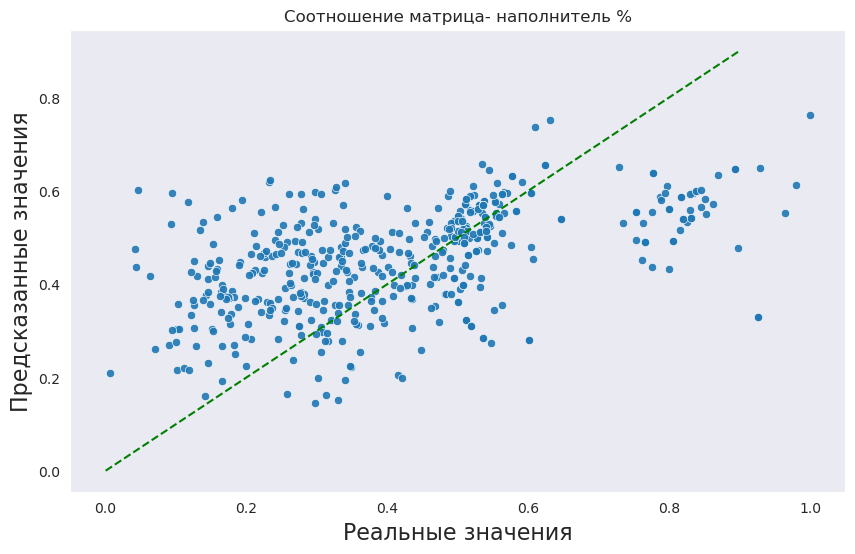

In [21]:
#визуализация
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.9)
line_X = np.arange(0.0, 1.0, 0.1)
line_Y = line_X
plt.plot(line_X, line_Y, 'g--')
plt.title("Соотношение матрица- наполнитель %", fontsize=12)
plt.xlabel('Реальные значения', fontsize=16)
plt.ylabel('Предсказанные значения', fontsize=16)
plt.show()

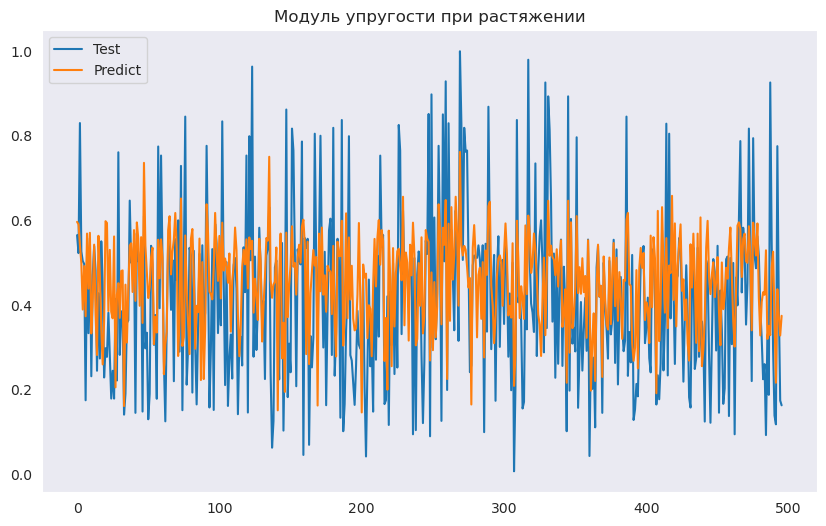

In [23]:
#Визуализация предсказанных значений целевой переменной
def pred_plot(y_test, y_pred):
  plt.figure(figsize=(10, 6))
  plt.title('Модуль упругости при растяжении')
  plt.plot(y_test, label='Test')
  plt.plot(y_pred, label='Predict')
  plt.legend(loc='best')
pred_plot(y_test, y_pred)

In [24]:
data = pd.DataFrame({'Актуальные': y_test, 'Предсказанные': y_pred})
data.tail(20).T

,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495
Актуальные,0.517146,0.486968,0.562220,0.516611,0.391559,0.322022,0.224503,0.260251,0.092456,0.328294,0.187633,0.926195,0.551863,0.296384,0.138692,0.117924,0.775581,0.407570,0.174159,0.162848
Предсказанные,0.553632,0.517061,0.592894,0.417797,0.328118,0.407423,0.430276,0.424170,0.529380,0.319849,0.350658,0.328710,0.489005,0.526050,0.366700,0.216234,0.437329,0.374077,0.327960,0.374493


## Сохранение модели

In [ ]:
model.save('matrix_fill')

In [22]:
model.save_weights('matrix_fill/weights')